# How to classify MNIST digits with a simple neural network architecture?

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils  import to_categorical
from tensorflow.keras.layers import Dense # Dense layers are "fully connected" layers
from tensorflow.keras.models import Sequential # Documentation: https://keras.io/models/sequential/
import matplotlib.pyplot as plt



Load the MNIST data (or downlaod it if not already done) 

In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [20]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Prepare and convert the data

In [21]:
np.set_printoptions(linewidth=150)   # Enlarge the line the see all the element in one column
print(x_train[2024])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   5  18  18 131 136 136 164 254 255 254 249 136  59   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   8 152 253 253 253 253 253 253 253 253 253 253 253 253 14

In [22]:
print(y_train[2024])

7


In [23]:
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

# Flatten the images
image_vector_size = 28*28   # = 784 
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)


In [24]:
print("Training label shape: ", y_train.shape) # (60000,) -- 60000 numbers (all 0-9)
print("First 5 training labels: ", y_train[:5]) # [5, 0, 4, 1, 9]

# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])

Training label shape:  (60000,)
First 5 training labels:  [5 0 4 1 9]
First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [27]:
print(y_train[2024])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [28]:
model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=64, activation='sigmoid', input_shape=(image_vector_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


Compile, train and evaluate the model

In [29]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=1)

Epoch 1/5
422/422 [==============================] - 1s 3ms/step - loss: 0.2293 - accuracy: 0.9381 - val_loss: 0.1970 - val_accuracy: 0.9475
Epoch 2/5
422/422 [==============================] - 1s 3ms/step - loss: 0.2239 - accuracy: 0.9388 - val_loss: 0.1986 - val_accuracy: 0.9485
Epoch 3/5
422/422 [==============================] - 1s 3ms/step - loss: 0.2208 - accuracy: 0.9395 - val_loss: 0.1922 - val_accuracy: 0.9530
Epoch 4/5
422/422 [==============================] - 1s 3ms/step - loss: 0.2185 - accuracy: 0.9402 - val_loss: 0.1869 - val_accuracy: 0.9540
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2254 - accuracy: 0.9380


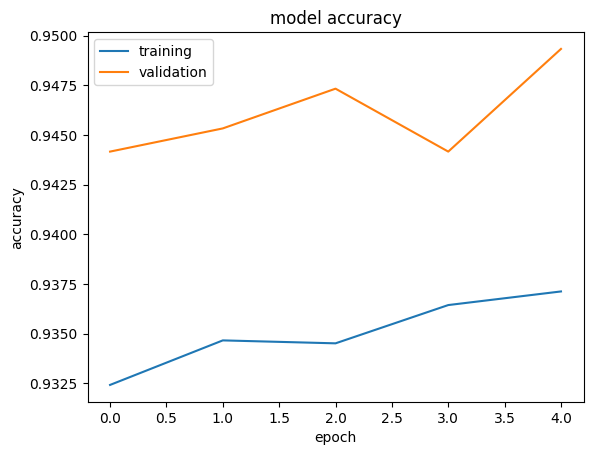

Test loss: 0.234
Test accuracy: 0.934


In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [37]:
print( np.argmax( model.predict( np.array([x_train[23951]]) )))

1/1 [==============================] - 0s 20ms/step
7
